<a href="https://colab.research.google.com/github/ranaharoonkhan/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
header=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
data= pd.read_csv('crx.data',header=None,names=header, na_values="?")
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
data.shape

(690, 16)

In [0]:
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [0]:
data.describe(exclude=int)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A12,A13,A14,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690,690,677.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,2,3,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,f,g,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,374,625,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,NaN,NaN,184.014771,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,NaN,NaN,173.806768,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,NaN,NaN,75.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,160.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,NaN,NaN,276.000000,NaN


In [0]:
data['A2'].value_counts()

22.67    9
20.42    7
24.50    6
22.50    6
25.00    6
        ..
44.83    1
60.58    1
50.08    1
34.58    1
28.33    1
Name: A2, Length: 349, dtype: int64

In [0]:
data['A3'].value_counts()

1.500     21
0.000     19
3.000     19
2.500     19
1.250     16
          ..
12.125     1
13.915     1
22.000     1
12.835     1
10.915     1
Name: A3, Length: 215, dtype: int64

In [0]:
data['A8'].value_counts()

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
3.960     1
2.040     1
1.040     1
4.165     1
5.375     1
Name: A8, Length: 132, dtype: int64

In [0]:
data['A11'].value_counts()

0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
8      10
9      10
14      8
12      8
10      8
15      4
16      3
17      2
20      2
40      1
13      1
19      1
23      1
67      1
Name: A11, dtype: int64

In [0]:
data['A14'].value_counts()

0.0      132
120.0     35
200.0     35
160.0     34
100.0     30
        ... 
224.0      1
186.0      1
32.0       1
432.0      1
202.0      1
Name: A14, Length: 170, dtype: int64

In [0]:
print(data['A15'].value_counts())

0       295
1        29
1000     10
500      10
2         9
       ... 
2503      1
6590      1
1465      1
5552      1
283       1
Name: A15, Length: 240, dtype: int64


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# checking our class column
data['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [0]:
#grouping our data set as per our class attribute approved cards 
aproved_cards=data[data['A16']=='+']
aproved_cards.shape

(307, 16)

In [0]:
#grouping our data set as per our class attribute rejected cards 
rejected_cards=data[data['A16']=='-']
rejected_cards.shape

(383, 16)

In [0]:
aproved_cards.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
200,a,24.08,0.50,u,g,q,h,1.250,t,t,1,f,g,0.0,678,+
606,b,16.17,0.04,u,g,c,v,0.040,f,f,0,f,g,0.0,0,+
244,b,18.50,2.00,u,g,i,v,1.500,t,t,2,f,g,120.0,300,+
24,a,41.17,6.50,u,g,q,v,0.500,t,t,3,t,g,145.0,0,+
222,a,17.58,9.00,u,g,aa,v,1.375,t,f,0,t,g,0.0,0,+


In [0]:
rejected_cards.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
648,b,25.58,0.335,u,g,k,h,3.500,f,f,0,t,g,340.0,0,-
85,b,37.17,4.000,u,g,c,bb,5.000,t,f,0,t,s,280.0,0,-
73,b,44.25,0.500,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
335,b,27.67,0.750,u,g,q,h,0.165,f,f,0,t,g,220.0,251,-
637,b,19.50,9.585,u,g,aa,v,0.790,f,f,0,f,g,80.0,350,-


In [0]:
crosstab_approved = pd.crosstab(aproved_cards['A1'], aproved_cards['A16'])
crosstab_approved

A16,+
A1,
a,98
b,206


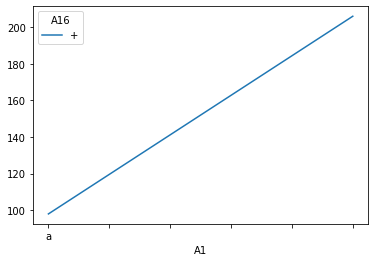

In [0]:
crosstab_approved.plot();

In [0]:
crosstab_rejected = pd.crosstab(rejected_cards['A1'],rejected_cards['A16'])
crosstab_rejected

A16,-
A1,
a,112
b,262


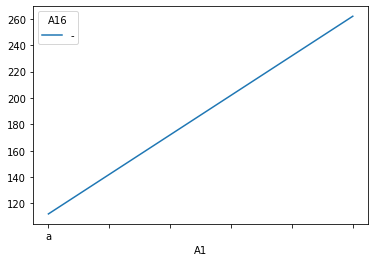

In [0]:
crosstab_rejected.plot();

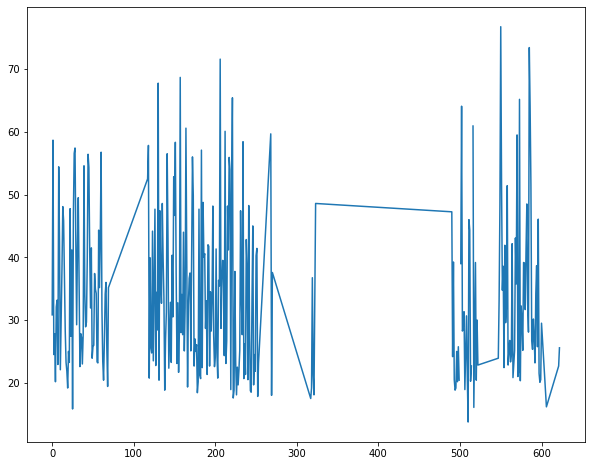

In [0]:
aproved_cards['A2'].plot(figsize=(10,8));

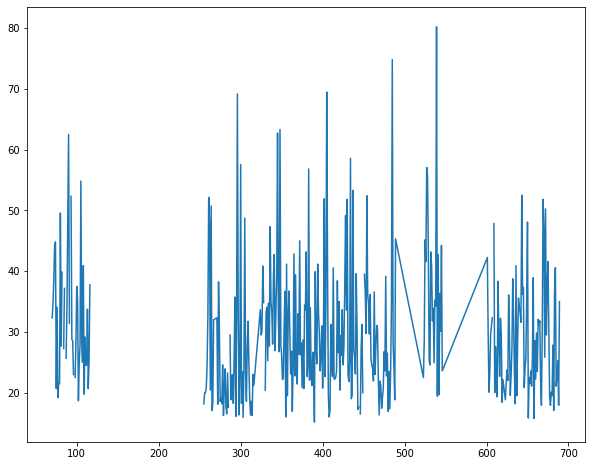

In [0]:
rejected_cards['A2'].plot(figsize=(10,8));

In [0]:
# checking the difference between 6 continues vaiables class wise
print(aproved_cards['A2'].mean())
print(rejected_cards['A2'].mean())

33.7204918032787
29.80823056300268


In [0]:
print(aproved_cards['A3'].mean())
print(rejected_cards['A3'].mean())

5.904951140065144
3.839947780678851


In [0]:
print(aproved_cards['A8'].mean())
print(rejected_cards['A8'].mean())

3.427899022801302
1.2579242819843346


In [0]:
print(aproved_cards['A11'].mean())
print(rejected_cards['A11'].mean())

4.605863192182411
0.6318537859007833


In [0]:
print(aproved_cards['A14'].mean())
print(rejected_cards['A14'].mean())

164.421926910299
199.6994680851064


In [0]:
print(aproved_cards['A15'].mean())
print(rejected_cards['A15'].mean())


2038.85993485342
198.60574412532637


In [0]:
#As we can see A3 is less difference and A15 is alot differnce we ill use two feature to run our ttest 
from scipy.stats import ttest_ind,ttest_ind_from_stats,ttest_rel
ttest_ind(aproved_cards['A3'],rejected_cards['A3'],nan_policy='omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [0]:
ttest_ind(aproved_cards['A15'],rejected_cards['A15'],nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [0]:
#making crosstabs with out catagorical variables
crosstabA1=pd.crosstab(data['A1'],data['A16'])
crosstabA1

A16,+,-
A1,,
a,98,112
b,206,262


In [0]:
from scipy.stats import ttest_ind,ttest_ind_from_stats,ttest_rel,stats
stats.chisquare(crosstabA1)


Power_divergenceResult(statistic=array([38.36842105, 60.16042781]), pvalue=array([5.85725757e-10, 8.74324572e-15]))

In [0]:
# checking first catagorical variable with class
crosstabA4=pd.crosstab(data['A4'],data['A16'])
crosstabA4

A16,+,-
A4,,
l,2,0
u,256,263
y,45,118


In [0]:
#checking 2nd catgorical variable with class
crosstabA13=pd.crosstab(data['A13'],data['A16'])
crosstabA13

A16,+,-
A13,,
g,287,338
p,5,3
s,15,42


In [0]:
#chisquare on first catagorical
stats.chisquare(crosstabA4)

Power_divergenceResult(statistic=array([365.96039604, 273.27559055]), pvalue=array([3.40964923e-80, 4.55994382e-60]))

In [0]:
#chisquare on 2nd catagorical
stats.chisquare(crosstabA13)

Power_divergenceResult(statistic=array([500.35179153, 525.74934726]), pvalue=array([2.23866425e-109, 6.83879855e-115]))

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
** The ttest which i ran were on to continues varibales class wise , in which one was so different in the means and the other was least diffenrt in the mean class wise .**
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?
**The most challanging part was data itself as it was confidential with no specific headers was a big confusion and took alot of time thinking of where to start with.**

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



A Bayesian approach is a conditional probability or a probabilistic construct that allows new information to be combined with existing information and the probability of an outcome as the frequency of the number of times the outcome occurs relative to the number of times that it could have occured is frequent approach below is the statistical inference :
**BAYESIAN**
• uses probabilities for both hypotheses and data.
• depends on the prior and likelihood of observed data.
• requires one to know or construct a ‘subjective prior’.
• may be computationally intensive due to integration over many parameters.
**Frequent** 
• never uses or gives the probability of a hypothesis (no prior or posterior).
• depends on the likelihood for both observed and unobserved data.
• does not require a prior.
• tends to be less computationally intensive

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.